# Market Basket Analysis

Market basket analysis help in identifying useful and significant association between items by using the lists of transactions. These association can be depicted in the form of rule that has an antecedent and a consequent. Given that we have been provided with record of the transactions of a grocery stores. We would like to exammine the possible association between the items.

In [1]:
import pandas as pd
import csv

### Import Dataset
"Market_Basket_Data.csv" dataset is provided which contains all the items purchased in each transaction per row. Other than the items, there are no other attributes about the transactions, thus saving much effort to preprocess unrelevant attributes. First, we use pd.read_csv to load the csv file provided as a pandas DataFrame.  The comma-separated items are then converted to the DataFrame into a list of lists. Let's have a look on the dataset by importing the csv file.

In [2]:
# Load transactions data from the csv file
# Store into list of strings called groceries

transactions=[]
with open('Market_Basket_Data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        transactions.append(row)
    

The data is loaded and below show the list of all transactions.

In [3]:
# Check the list
print(transactions)

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra d

To get a feel of how it is structured, the code chunk below print the first transcation.

In [4]:
# Print the first transaction
print(transactions[0])

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']


In overall, there are 7501 transactions.

In [5]:
print(len(transactions))

7501


#### Generating rules with itertools

An association rule contains an antecedent and a consequent. A simple rule with one antecedent and one consequent might be "if A then B." We can also have more complicated rules, which have multiple antecedents, such as "if A and B then C." Or multi-consequent rules, such as "if A then B and C."

#### Explore the transaction data

Before further processing, we should explore and understand the structure of the transaction data. It is obvious that we are working on massive number of transactions which record the purchased items from supermarket. Each row represent each transactions that have been made. There are 120 different items across the transactions as listed below.

In [6]:
from itertools import permutations

# Identify the unique items
flattened = [item for transaction in transactions for item in transaction]
items= list(set(flattened))
#print(items)

In [7]:
# Number of items
# Items from all the transactions 
print(f'There are {len(items)} items.\n\nThey are {", ".join(items)}')

There are 120 items.

They are cauliflower, pasta, soup, light cream, vegetables mix, honey, ketchup, ground beef, hot dogs, sandwich, chili, light mayo, chicken, parmesan cheese, yogurt cake, mint, whole wheat rice, strawberries, pickles, zucchini, spaghetti, fresh tuna, chocolate bread, bacon, magazines, fromage blanc, burger sauce, flax seed, green grapes, tomato juice, butter, oil, oatmeal, ham, brownies, green tea, white wine, candy bars, melons, strong cheese, milk, asparagus, cream, napkins, clothes accessories, soda, shrimp, tomatoes, frozen smoothie, gluten free bar, cottage cheese, burgers, energy bar,  asparagus, water spray, blueberries, avocado, almonds, french fries, cake, pet food, gums, fresh bread, barbecue sauce, whole wheat pasta, hand protein bar, salad, salmon, cookies, red wine, antioxydant juice, low fat yogurt, escalope, shampoo, whole weat flour, frozen vegetables, dessert wine, pepper, bug spray, green beans, spinach, salt, babies food, eggplant, eggs, grated 

Let's iterate through all one-antecedent, one-consequent rules. We can do this by starting with one item as the antecedent and pairing another item with all possible consequents. We repeat this for all remaining possible antecedents. Since we only consider unique items in a transaction, we will not include rules where the antecedent and consequent are the same. 

Permutations function from itertools is used to generate this list by iterating over all sets of two items. Permutations is imported and then the unique set of items is extracted. The list of lists is flattened into a list of items and set function is used to identify the unique items and a list of unqie items is outputted. Permutations generate all sets of two items which then converted to a list as shown below:


In [8]:
# Compute the possible rules
rules = list(permutations(items,2))
print(rules)

[('cauliflower', 'pasta'), ('cauliflower', 'soup'), ('cauliflower', 'light cream'), ('cauliflower', 'vegetables mix'), ('cauliflower', 'honey'), ('cauliflower', 'ketchup'), ('cauliflower', 'ground beef'), ('cauliflower', 'hot dogs'), ('cauliflower', 'sandwich'), ('cauliflower', 'chili'), ('cauliflower', 'light mayo'), ('cauliflower', 'chicken'), ('cauliflower', 'parmesan cheese'), ('cauliflower', 'yogurt cake'), ('cauliflower', 'mint'), ('cauliflower', 'whole wheat rice'), ('cauliflower', 'strawberries'), ('cauliflower', 'pickles'), ('cauliflower', 'zucchini'), ('cauliflower', 'spaghetti'), ('cauliflower', 'fresh tuna'), ('cauliflower', 'chocolate bread'), ('cauliflower', 'bacon'), ('cauliflower', 'magazines'), ('cauliflower', 'fromage blanc'), ('cauliflower', 'burger sauce'), ('cauliflower', 'flax seed'), ('cauliflower', 'green grapes'), ('cauliflower', 'tomato juice'), ('cauliflower', 'butter'), ('cauliflower', 'oil'), ('cauliflower', 'oatmeal'), ('cauliflower', 'ham'), ('cauliflower

In [9]:
# Number of rules
print(f"This yields {len(rules)} of possible rules whereby we only had {len(items)} items and ignored multi-antecedent and multi-consequent rules.")

This yields 14280 of possible rules whereby we only had 120 items and ignored multi-antecedent and multi-consequent rules.


Finding good rules can be challenging. The number of possible rules is enormous for our data as it has about 120 items. Since most rules are not useful, we must find a way to discard rules that are unlikely to be helpful for the task at hand. We could start, for instance, by looking exclusively at simple rules with one antecedent and one consequent. As we will see, this is still challenging.

#### One-hot encoding transaction data

Here, we are not concerning on how many items that a customer has purchased for each item. Our main focus here is whether an item is purchased or not. To check this, we are required to transform transactions in to a one-hot encoded Data Frame, whereby each column of item will consist of True or Falso values to indicate whether an item was included in a transaction.

We'll next import TransactionEncoder from the preprocessing submodule of mlxtend and instantiate a transaction encoder and use its fit method to identify the unique items in the dataset.

We next use the transform method to construct an array of one-hot encoded transactions called onehot. Each column in onehot corresponds to one of the nine items in our dataset. If the item is present in a transaction, this is encoded as TRUE. Otherwise, it is FALSE. Finally, we'll use this array to construct a DataFrame with the item names as column headers.

Note: Open Anaconda command windows, input this command: pip install mlxtend before import the modules here

In [10]:
# Import the transaction encoder function from mlxtend
# If this is your first time running mlxtend
# please open your command prompt
# input: pip install mlxtend to install the package

import mlxtend
from mlxtend.preprocessing import TransactionEncoder

In [11]:
# Instantiate transaction encoder
encoder = TransactionEncoder().fit(transactions)

In [12]:
# One-hot encode itemsets by applying fit and transform
onehot = encoder.transform(transactions)

In [13]:
# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
print(display(onehot))

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


None


In [14]:
# Compute support for single items
support = onehot.mean().sort_values(ascending=False)
print(support)

mineral water    0.238368
eggs             0.179709
spaghetti        0.174110
french fries     0.170911
chocolate        0.163845
                   ...   
bramble          0.001866
cream            0.000933
napkins          0.000667
water spray      0.000400
 asparagus       0.000133
Length: 120, dtype: float64


The support of each item is computed to identify the frequently purchased items. Mineral water is the popular item of purchased as it has the highest support value of 0.238 which is about 1788 transactions. Asparagus is reported as the least popular item as is only has around 0.0001 support value and it is only found in one transaction. 

In [15]:
# Check minimum support
print(f"{support.idxmin()} has the lowest support of {support.min()}")

# Check maximum support
print(f"{support.idxmax()} has the highest support of {support.max()}")

 asparagus has the lowest support of 0.0001333155579256099
mineral water has the highest support of 0.23836821757099053


#### Filter transaction : Bought More than 1 items only

Our primary objective in market basket analysis is to discover the association between 2 or more items that are purchased from the transaction data. Thus, transaction where only single item is purchased would not give any useful details for to uncover the association between the items. Hence, only transactions that is bout more than 1 item are kept.

In [16]:
onehot = onehot[(onehot>0).sum(axis="columns")>=2].reset_index(drop=True)
print(display(onehot))

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5742,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5743,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5744,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5745,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


None


After filtering, we are left with 5747 transactions that is bought more than 1 item.

#### Visualizing the rules

Market basket analysis often leaves us with many rules and we have found that there are about rules of. It is challenging to select among these rules that could display the siginificant relationship between the items. To move forward, we are creating an informative visualization here to guide the pruning process and summarize final results, which will typically take the form of itemsets or rules. We will visualize the scenario using scatterplots that can help to evaluate general tendencies in the behaviors of rules for many antecedents and consequents, but without isolating any rule in particular.

In market basket analysis, those values might be antecedent support and consequent support or confidence and lift. Scatterplots do not typically assume an underlying model. No trend line or fitted curve is needed. Scatterplots are useful in market basket analysis because they can provide guidance for further pruning rounds. Identifying the correct pruning thresholds may be difficult to do via trial-and-error, but looking at a scatterplot could make it clear where the relevant thresholds are located.

We'll start by importing seaborn and pandas. We'll also need to apply Apriori and generate association rules, so we'll import the relevant libraries from mlxtend. Next, we'll continue using the onehot encoded data and generate some rules. Since we want to do pruning after we view the scatterplot, we'll use low thresholds and apply them exclusively to support. Finally, we'll generate a simple scatterplot of antecedent support and consequent support using the seaborn scatterplot function. At a minimum, we must supply a value for the x variable, a value for the y variable, and the input data, which is in the form of a pandas DataFrame.

array([[<AxesSubplot:title={'center':'support'}>]], dtype=object)

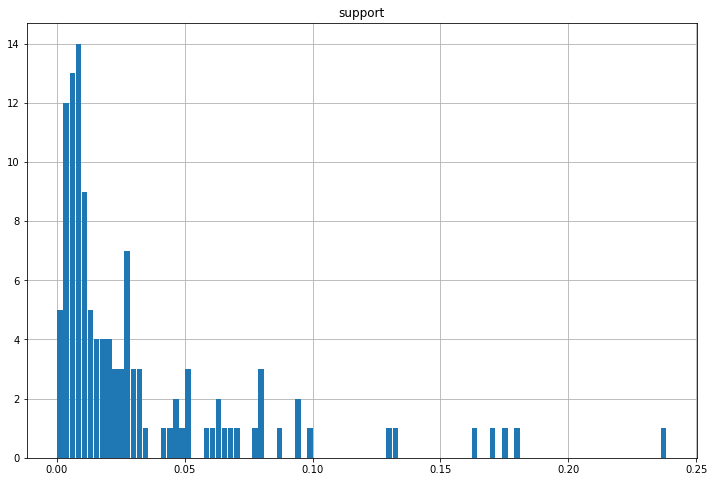

In [17]:
import matplotlib.pyplot as plt

support_df=pd.DataFrame(support,columns=["support"])
support_df.hist(bins=100, figsize=(12,8), zorder=2, rwidth=0.9)

In [18]:
support_df.describe()

,support
count,120.000000
mean,0.032616
std,0.042370
min,0.000133
25%,0.007566
50%,0.015665
75%,0.035929
max,0.238368


The histogram shows the distribution of the support values. Most of the items has support value mainly in the interval of 0 to 0.05. Let's enlarge the the distribution of these range to have better view on the distribution.

array([[<AxesSubplot:title={'center':'support'}>]], dtype=object)

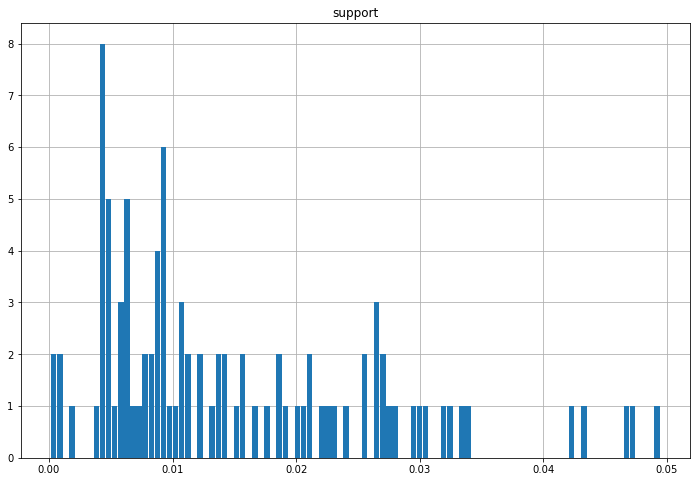

In [19]:
support_df[support_df["support"]<=0.05].hist(bins=100, figsize=(12,8), zorder=2, rwidth=0.9)

In [20]:
support_df[support_df["support"]<=0.05].describe()

,support
count,95.000000
mean,0.015032
std,0.011560
min,0.000133
25%,0.006133
50%,0.010799
75%,0.022397
max,0.049460


In [21]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

# Import seaborn under its standard alias of sns
import seaborn as sns

# Generate frequent itemsets using Apriori
frequent_itemsets1 = apriori(onehot, min_support=0.005, use_colnames=True, max_len=2)
frequent_itemsets2 = apriori(onehot, min_support=0.005, use_colnames=True, max_len=3)

# Generate association rules
rules1= association_rules(frequent_itemsets1, metric='support', min_threshold=0.0)
rules2= association_rules(frequent_itemsets2, metric='support', min_threshold=0.0)

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

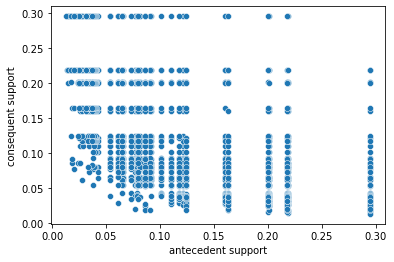

In [22]:
# Scatter plot
sns.scatterplot(x="antecedent support", y="consequent support" ,data=rules1)

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

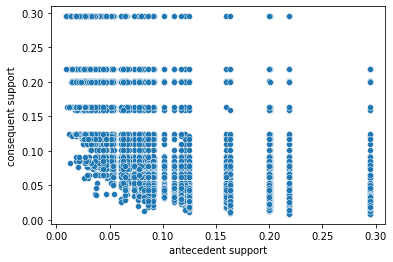

In [23]:
sns.scatterplot(x="antecedent support", y="consequent support" ,data=rules2)

We can observed that values clustered below 0.15. There are no antedent or consequent support values which exceed 0.3, thus any pruning that we are going to perform should focus on values within these bounds. 

Considering that two metrics will not be sufficient to identify a relationship of interest. Rather than looking at antecedent support and consequent support, we might wonder how the picture changes when we include lift. That is, does lift have a tendency to be high or low for certain antecedent and consequent support values? We can examine this by changing the size of the dots in the scatterplot based on their lift values. The scatterplot function allows this through the use of the size parameter.

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

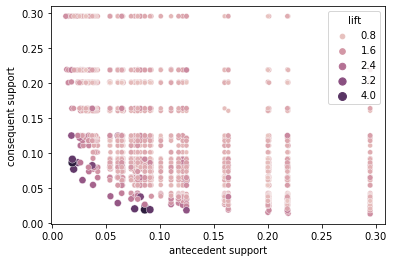

In [24]:
# Scatter plot
sns.scatterplot(x="antecedent support", y="consequent support", size="lift" ,data=rules1,hue="lift")

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

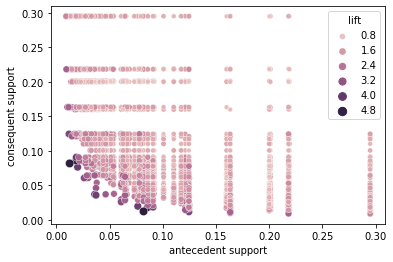

In [25]:
# Scatter plot
sns.scatterplot(x="antecedent support", y="consequent support", size="lift" ,data=rules2,hue="lift")

We've now re-drawn the same plot, but allowed high lift values to be associated with bigger dots. Due to massive data points that we have, we are adding a third variable with hue to show the size of lift. The larger the value of lift, the darker the color and the larger the color of dots. Immediately, we can see that the biggest dots are clustered around very low antecedent and consequent support values. Such results could be generated by a small number of users, which suggests that the high lift values might not be as informative as we would normally expect. To the contrary, this plot should convince us to treat very high values of lift with skepticism.

<AxesSubplot:xlabel='support', ylabel='confidence'>

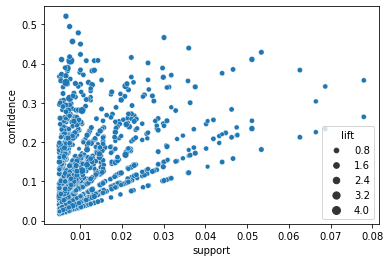

In [26]:
# Scatter plot
sns.scatterplot(x="support", y="confidence", size="lift" ,data=rules1)

<AxesSubplot:xlabel='support', ylabel='confidence'>

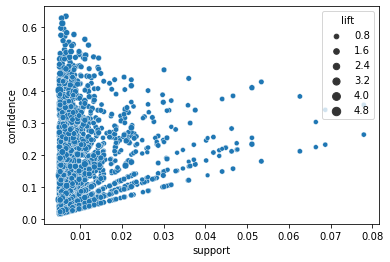

In [27]:
# Scatter plot
sns.scatterplot(x="support", y="confidence", size="lift" ,data=rules2)

We notice that the confidence-support border roughly forms a triangle which suggests that throwing out low support rules would also mean that we would discard rules that are strong according to many common metrics. So we should take these into consideration while pruning using the metrics.

<AxesSubplot:xlabel='support', ylabel='confidence'>

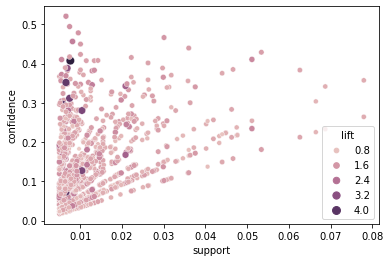

In [28]:
# Scatter plot
sns.scatterplot(x="support", y="confidence", size="lift" ,data=rules1,hue="lift")

<AxesSubplot:xlabel='support', ylabel='confidence'>

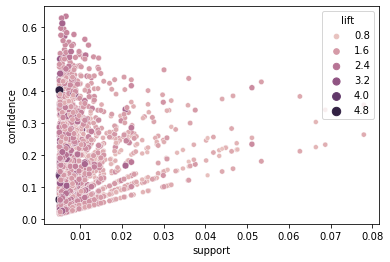

In [29]:
# Scatter plot
sns.scatterplot(x="support", y="confidence", size="lift" ,data=rules2,hue="lift")

<AxesSubplot:xlabel='support', ylabel='lift'>

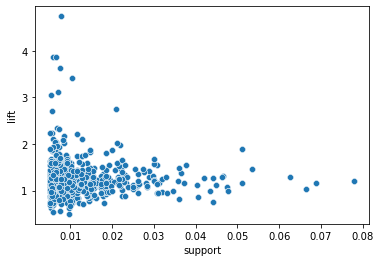

In [30]:
sns.scatterplot(x="support", y="lift" ,data=rules1)

<AxesSubplot:xlabel='support', ylabel='lift'>

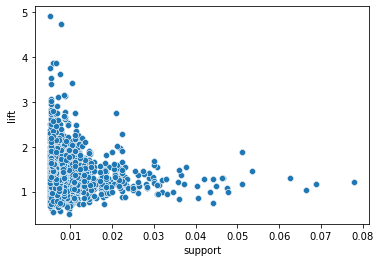

In [31]:
sns.scatterplot(x="support", y="lift" ,data=rules2)

### Apriori Implementation

In [57]:
# Compute freqent itemsets
frequent_itemsets = apriori(onehot, 
                            min_support=0.005, max_len=3, 
                            use_colnames=True).sort_values('support',ascending=False).reset_index(drop=True)

frequent_itemsets['length'] = frequent_itemsets["itemsets"].apply(lambda x:len(x))
# Print number of itemsets
print(len(frequent_itemsets))
print(frequent_itemsets)

1040
       support                   itemsets  length
0     0.294936            (mineral water)       1
1     0.218897                     (eggs)       1
2     0.218201                (spaghetti)       1
3     0.201148                (chocolate)       1
4     0.200104             (french fries)       1
...        ...                        ...     ...
1035  0.005046      (salmon, cooking oil)       2
1036  0.005046      (spaghetti, eggplant)       2
1037  0.005046       (turkey, eggs, milk)       3
1038  0.005046    (green tea, eggs, milk)       3
1039  0.005046  (turkey, eggs, green tea)       3

[1040 rows x 3 columns]


In applying apriori algorithm, the frequently bought items are determine by looking at the support value. We choose to define the frequently bought items as an items that is bought as many as 0.5% out of the whole transaction, which means the support value is set to be 0.005. There are 733 transactions that are considered as frequently bough items. Mineral water, effs and spaghetti are the top 3 of the most frequently boought items. 

Though we have some views about the frequently bough items, the analysis is continued to find the association between the items to discover some knowledge about which items that can be effectively sold together. Since the set of potential rules would be large, besides Apriori algorithm, we are applying multi-metric filtering to narrow it down to identify the frequent itemsets.

Lift had a simple interpretation which is more intuitive and easy to convey as values greater than 1 indicate that the items cooccur more than we would expect if they were independently distributed across transactions. 

For the case below, we choose lift as our metric with minimun threshold of 3, followed by other metrics to prune the itemsets.

In [61]:
rules1 =  association_rules(frequent_itemsets, metric="lift", min_threshold=3)

In [62]:
print(display(rules1))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole wheat pasta),(olive oil),0.037237,0.081956,0.010440,0.280374,3.421037,0.007388,1.275724
1,(olive oil),(whole wheat pasta),0.081956,0.037237,0.010440,0.127389,3.421037,0.007388,1.103313
2,"(herb & pepper, mineral water)",(ground beef),0.022272,0.124587,0.008700,0.390625,3.135366,0.005925,1.436576
3,(ground beef),"(herb & pepper, mineral water)",0.124587,0.022272,0.008700,0.069832,3.135366,0.005925,1.051130
4,"(spaghetti, herb & pepper)",(ground beef),0.021228,0.124587,0.008352,0.393443,3.157982,0.005707,1.443249
5,(ground beef),"(spaghetti, herb & pepper)",0.124587,0.021228,0.008352,0.067039,3.157982,0.005707,1.049102
6,(pasta),(escalope),0.018792,0.085958,0.007656,0.407407,4.739616,0.006041,1.542446
7,(escalope),(pasta),0.085958,0.018792,0.007656,0.089069,4.739616,0.006041,1.077148
8,(mushroom cream sauce),(escalope),0.024013,0.085958,0.007482,0.311594,3.624963,0.005418,1.327766
9,(escalope),(mushroom cream sauce),0.085958,0.024013,0.007482,0.087045,3.624963,0.005418,1.069042


None


In [63]:
filtered_rules = rules1[(rules1['antecedent support']>0.005) &
                       (rules1['consequent support']>0.005) &
                       (rules1['confidence']>0.4) &
                       (rules1['support']>0.005) &
                       (rules1['conviction']>1)
                      ].sort_values('lift',ascending=False).reset_index(drop=True)
print(display(filtered_rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(whole wheat pasta, mineral water)",(olive oil),0.012528,0.081956,0.005046,0.402778,4.914573,0.004019,1.537190
1,(pasta),(escalope),0.018792,0.085958,0.007656,0.407407,4.739616,0.006041,1.542446
2,"(herb & pepper, chocolate)",(ground beef),0.011832,0.124587,0.005220,0.441176,3.541119,0.003746,1.566529
3,"(frozen vegetables, soup)",(milk),0.010440,0.163390,0.005220,0.500000,3.060170,0.003514,1.673221


None


The use of Apriori algorithm and advanced filtering helps to determine potentially useful and interesting rule. If you look in the `antecedents` column and the `consequents` column, you’ll see names of products. Each rule tells us that the `antecedents` is sold along with the `consequents`. You can use this information to build a cross-sell recommendation system that promotes these products with each other on your website (or in person when doing in-person sales).

Without knowing much more about the business that generated this data, we can’t really do much more with it. If you were using your own data, you’d be able to dig a bit deeper to find those rules with higher confidence and/or lift to help you understand the items that are sold together most often and start building strategies to promote those items (or other items if you are trying to grow sales in other areas of your business).

## Conclusion

In terms of item placement, we could suggest the groceries to put Whole wheat pasta, mineral water and olive oil in closer place either on the same shelf or any place closer to each other so that will be easy for people to reach out the items.

We could suggest putting Whole wheat pasta, mineral water and olive oil as a single bundle of products or special packs a lower price compare which would attract customer to buy and generate more profit in return. We could suggest running discounts and promotion on the items. Whenever customer purchase:

- pasta, mineral water, they will get discount in buying olive oil
- pasta, they will get discount in buying escalope or
- Chocolate, herb & pepper, they will get discount in buying ground beef or
- Frozen vegetables, soup, they will get discount to in buying milk or

The shop could advertise for the special deal on the day to recommend customer to buy the combination of items in order to get discount.

#### Future Work

- We could take Zhang’s metric into consideration in pruning process as it is comprehensive in telling us the association as well as disassociation about the items. 
- Perform aggregation on the original transactional data by grouping items together into categories which can help to reduces the sparse of items for example  in our case, the groceries sold parmesan cheese, strong cheese, cottage cheese and grated cheese which are the subsets of category cheese. 
